In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_AI/main/AI_project_data.csv")

In [2]:
#get the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [3]:
#To see if there is any null row 
df.isnull()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5704,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5705,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='LONG_WGS84', ylabel='LAT_WGS84'>

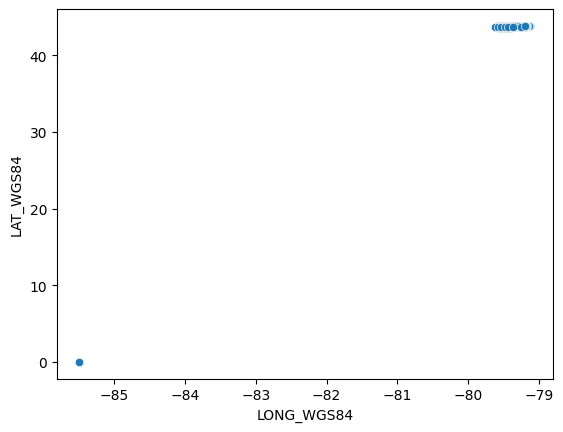

In [4]:
#use scatterplot to see if there is any outlier or missing values for longtitude and latitude
sns.scatterplot(data = df, x = "LONG_WGS84", y = "LAT_WGS84")

In [5]:
#Drop these rows with missing values, after dropping rows whose latitude is 0
#we got 5645 rows left, 
#which means there are 62 rows containing y = 0.
df.drop(df[df['Y'] == 0].index, axis = 0, inplace = True)

In [6]:
df.drop_duplicates()
#to drop duplicates but found there are no duplicates in these cases.

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [7]:
#Find rows with "NSA" in column "HOOD_158"
df.loc[df["HOOD_158"] == "NSA"]

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
232,-79.543821,43.772941,233,GO-20051440086,2005/12/01 05:00:00+00,2005,December,Thursday,335,1,...,Evening,D31,1,0,NSA,NSA,NSA,NSA,-79.543821,43.772941
582,-79.603380,43.757866,583,GO-20061567864,2006/04/15 04:00:00+00,2006,April,Saturday,105,15,...,Evening,D23,0,1,NSA,NSA,NSA,NSA,-79.603380,43.757866


In [8]:
#drop rows whose value of "HOOD_158" column is "NSA"
df.drop(232, axis=0, inplace=True)

In [9]:
df.drop(582, axis=0, inplace=True)

In [10]:
#Find rows with "NSA" in column "NEIGHBOURHOOD_158"
df.loc[df["NEIGHBOURHOOD_158"] == "NSA"]

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84


In [11]:
#Find rows with "NSA" in column "HOOD_140"
df.loc[df["HOOD_140"] == "NSA"]

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
4648,-79.574871,43.764348,4649,GO-20201624652,2020/08/28 04:00:00+00,2020,August,Friday,241,28,...,Afternoon,D31,0,1,21,Humber Summit,NSA,NSA,-79.574871,43.764348
5031,-79.574871,43.764348,5032,GO-20214289,2021/01/07 05:00:00+00,2021,January,Thursday,7,7,...,Evening,D31,0,0,21,Humber Summit,NSA,NSA,-79.574871,43.764348


In [12]:
#drop rows whose value of column "HOOD_140" is "NSA"
df.drop(4648, axis = 0, inplace = True)

In [13]:
df.drop(5031, axis = 0, inplace = True)

In [14]:
#Find rows with "NSA" in column "NEIGHBOURHOOD_140"
df.loc[df["NEIGHBOURHOOD_140"] == "NSA"]

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84


<Axes: xlabel='LONG_WGS84', ylabel='LAT_WGS84'>

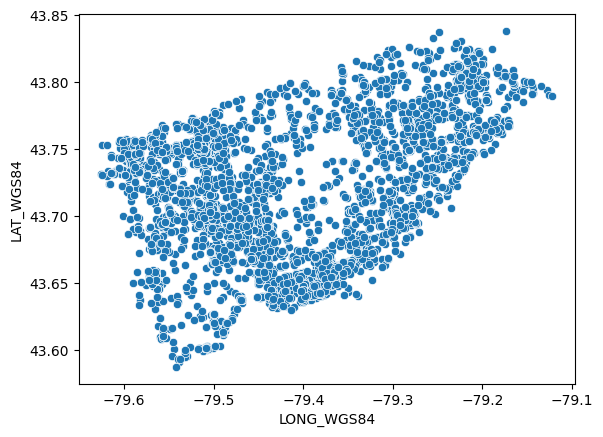

In [15]:
#See if any more outliers after dropping the missing values
sns.scatterplot(data = df, x = "LONG_WGS84", y = "LAT_WGS84")

In [16]:
# column "X" is same as column "LONG_WGS84", and column "Y" is same as "LAT_WGS84"
# but the column "LONG_WGS84" and "LAT_WGS84" are more accurate
# aiming to delete the column "X" and "Y"
df = df.drop('X', axis = 1)
df = df.drop('Y', axis = 1)

In [17]:
# find out how many cases happened in different regions for HOOD_158
# and sort the series in an ascending order
region_case = df.groupby('HOOD_158')['HOOD_158'].count()
region_case = region_case.sort_values()

In [18]:
# Since the risk level should be low, medium and high
# divide the series into three group equally to determine the risk range
low_risk_region = region_case.head(52)
medium_risk_region = region_case[53:107]
high_risk_region = region_case[107:]

In [19]:
# convert the series into a list and define a function which can return a risk level according to the region number
# create a new column "risk_level" and apply the function for every row
low = list(low_risk_region.index)
medium = list(medium_risk_region.index)
high = list(high_risk_region.index)
def risk_level (parameters):
    if parameters in low:
        return "Low"
    elif parameters in medium:
        return "Medium"
    else:
        return "High"
df['risk_level'] = df["HOOD_158"].apply(risk_level)

In [20]:
df

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,risk_level
0,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,High
1,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,High
2,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,High
3,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,High
4,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,Medium
5703,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,High
5704,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,High
5705,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,Medium


In [21]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [22]:
#install Canadian Holidays library and define a function that can convert the date to "Yes"/"No" to see if it is public holiday in Canada.
#create a new column "Public_Holiday" and apply the function to each row according to its date
from datetime import date
from holidays import CA
ca_holidays = CA()
def public_holiday(parameters):
    if parameters in ca_holidays:
        return "Yes"
    else:
        return "No"
df["Public_holiday"] = df["OCC_DATE"].apply(public_holiday)


In [23]:
#convert the cleaned data into a csv file for further analysis
df.to_csv('Group_Project.csv', index = False)